# Importing Libraries

In [ ]:
# Imports Libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install pmdarima
import pmdarima as arima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.6 MB/s eta 0:00:00


In [ ]:
# Used for styling of graphs
!pip install SciencePlots

import scienceplots
plt.style.use(['science', 'grid', 'no-latex'])

# Initialising Data

In [1]:
# Initialises data
yData = np.array([98, 173, 279, 422, 588, 716, 854, 907, 1139, 1364, 1637, 2074,
                  98, 175, 279, 422, 589, 716, 854, 907, 1139, 1364, 1637, 2074,
                  98, 173, 279, 422, 588, 717, 854, 907, 1000, 1364, 1637, 2074])

# Start year of data and year to predict to
START_YEAR = 2020
END_YEAR = 2030

# Period for seasonal differencing e.g. 4 is quarterly
PERIOD = 12

NameError: name 'np' is not defined

# Model

In [ ]:
# Creates the model
model = arima.auto_arima(yData, m=PERIOD)
print(model.summary())

# Uses the end year and period to determine the number of predictions
numPredictions = int((END_YEAR - START_YEAR - len(yData) / PERIOD) * PERIOD)
prediction = model.predict(n_periods=numPredictions)

                                SARIMAX Results                                 
Dep. Variable:                        y   No. Observations:                   36
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                -114.352
Date:                  Thu, 22 Feb 2024   AIC                            230.704
Time:                          20:45:33   BIC                            231.882
Sample:                               0   HQIC                           231.017
                                   - 36                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       805.3349     68.581     11.743      0.000     670.918     939.752
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               445.68
Prob(Q):                       

# Plotting Data

In [ ]:
# Initialises constants
X_LABEL = "x-axis label"
Y_LABEL = "y-axis label"

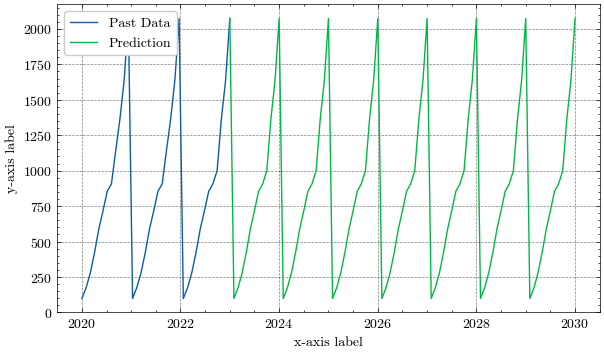

In [ ]:
# Initialises settings of the graph
plt.figure(figsize=(7,4))

plt.xlabel(X_LABEL)
plt.ylabel(Y_LABEL)

# Plots the regression
xPlot1 = np.linspace(START_YEAR, START_YEAR + len(yData) // PERIOD, len(yData))
xPlot2 = np.linspace(START_YEAR + len(yData) // PERIOD, END_YEAR, len(prediction) + 1)

plt.plot(xPlot1, yData, label='Past Data')
plt.plot(xPlot2, np.insert(prediction, 0, yData[-1]), label='Prediction')

plt.legend()
plt.show()